# Import required packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [13]:
a_arr = np.arange(0, 6)
b_arr = np.array(a_arr[1:4])

print("a before:", a_arr)
print("b before:", b_arr)

b_arr[0] = 1000

print("a after:", a_arr)
print("b after:", b_arr)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [0 1 2 3 4 5]
b after: [1000    2    3]


In [14]:
a_arr = np.arange(0, 6)
b_arr = a_arr[1:4].copy()

print("a before:", a_arr)
print("b before:", b_arr)

b_arr[0] = 1000

print("a after:", a_arr)
print("b after:", b_arr)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [0 1 2 3 4 5]
b after: [1000    2    3]


# Exercise 2

In [48]:
x = np.arange(1,13)
x = x.reshape(4,-1)
print(x)

print(x.shape[0])


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
4


In [31]:
a = np.arange(1, 4)
b = np.arange(5, 8)

print(a)
print(b)
print(np.dot(a,b))

[1 2 3]
[5 6 7]
38


In [42]:
A = np.array([[1, 3], [2, -1]])
B = np.array([5, -4])

x, y = np.linalg.solve(A,B)

print(x, y)

-1.0 2.0


# Exercise 3

In [36]:
A = [0, 1, 2]
B = [3, 0, 0]

angrad = np.arccos(np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B)))
angdeg = 180/np.pi*angrad

print(angdeg)

90.0


In [84]:
A = np.arange(1, 11)

B = np.array([2,1])

np.matmul(A, B)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 10)

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

[[ 1.        1.        1.       ...  1.        1.        1.      ]
 [-1.       -0.997998 -0.995996 ...  0.995996  0.997998  1.      ]]


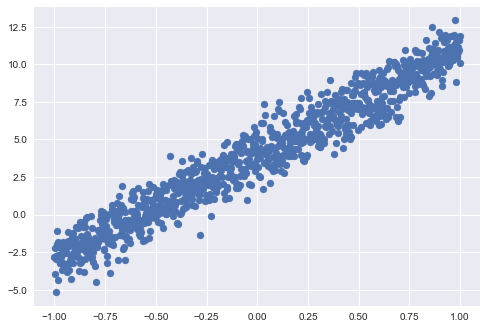

In [3]:
N = 1000 #sample size

true_beta = np.array([4,7])
x = np.linspace(-1,1,N)
x1 = np.vstack([np.ones(x.shape), x])

print(x1)


eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1)  + eps

plt.scatter(x,y)

## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [4]:
# Define the function for our linear model
# param is like beta
def model(param,x1):

    return np.matmul(x1.T, param)

# Define the function for our loss function
def loss_func(param, x1, y): 
    size = x1.shape[1]

    diff = model(param, x1) - y
    return 1/size*sum(diff**2)

def findgrad(param, x1, y):
    xlist = x1[1].copy()
    size = x1.shape[1]
    
    grad = np.array([-2/size*sum(model(beta, x1) - y), -2/size*sum(xlist*(model(beta, x1) - y))])
    return grad

def findH(param, x1, y):
    xlist = x1[1].copy()
    size = x1.shape[1]
    
    H = np.array([2, 2/size*sum(xlist), 2/size*sum(xlist), 2/size*sum(xlist**2)])
    H = H.reshape(2, 2)
    
    return H
    

beta = np.array([3, 10])
print(beta)

print(loss_func(beta, x1, y))
for i in range(1000):
        print("values:", model(beta, x1)[i], y[i])
        print("difference:", model(beta, x1)[i] - y[i])
    



[ 3 10]
5.055527652951204
values: -7.0 -2.8380974122020826
difference: -4.161902587797917
values: -6.97997997997998 -3.9368803881916845
difference: -3.0430995917882955
values: -6.95995995995996 -2.244495104609256
difference: -4.715464855350704
values: -6.93993993993994 -2.951105238445522
difference: -3.988834701494418
values: -6.91991991991992 -5.165268933961604
difference: -1.7546509859583157
values: -6.8998998998999 -2.729779018001601
difference: -4.170120881898299
values: -6.87987987987988 -1.1041632903569143
difference: -5.775716589522966
values: -6.85985985985986 -1.935789067098999
difference: -4.924070792760861
values: -6.83983983983984 -2.6964503551350885
difference: -4.143389484704752
values: -6.81981981981982 -1.8174139914265144
difference: -5.0024058283933055
values: -6.7997997997998 -4.37512231420954
difference: -2.4246774855902595
values: -6.77977977977978 -2.1340926404161404
difference: -4.645687139363639
values: -6.75975975975976 -2.1533312384061385
difference: -4.6064285

values: 6.393393393393394 5.899170017022259
difference: 0.494223376371135
values: 6.413413413413413 6.131711959633584
difference: 0.2817014537798288
values: 6.433433433433432 8.130456863815626
difference: -1.6970234303821936
values: 6.453453453453452 6.1978078845833835
difference: 0.25564556887006873
values: 6.473473473473474 6.342670494737358
difference: 0.13080297873611624
values: 6.493493493493494 7.4291563069085536
difference: -0.9356628134150595
values: 6.513513513513513 6.4076817871631615
difference: 0.10583172635035165
values: 6.533533533533532 5.358352351677862
difference: 1.1751811818556703
values: 6.553553553553554 6.789150355233045
difference: -0.23559680167949093
values: 6.573573573573574 8.926755548711949
difference: -2.3531819751383747
values: 6.593593593593594 5.8841465671842155
difference: 0.7094470264093786
values: 6.613613613613613 7.531703712187413
difference: -0.9180900985738001
values: 6.633633633633632 6.650242515725057
difference: -0.016608882091424526
values: 6.

Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [10]:
beta = np.random.normal(0,1,2) #initialize beta
print(beta)
tol = 1e-7 #toloerance
delta = 1 #a temp variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1

size = x1.shape[1]
print(size)

xlist = x1[1].copy()


while(delta >= tol):
    temploss = loss_func(beta, x1, y)
    
    grad = findgrad(beta, x1, y)
    H = findH(beta, x1, y)
    
#     print("grad: ", grad)
#     print("H: ", H)
#     for i in range(1000):
#         print("values:", model(beta, x1)[i], y[i])
#         print("difference:", model(beta, x1)[i] - y[i])
#     print("matmul: ", np.linalg.solve(H, grad))

    beta = beta + np.linalg.solve(H, grad)

    delta = abs(loss_func(beta, x1, y) - temploss)
#     print("delta: ", delta)
    
print("Beta: ", beta)
    



[-1.16565116 -0.18783295]
1000
Beta:  [3.99048462 6.96727215]


## Visualizing the result

The estimated value for beta is: [ 2.97759555 10.00263209]
The true value for beta is: [ 3 10]


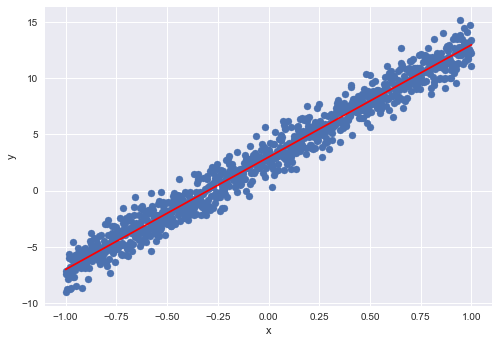

In [260]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [20]:
beta = np.random.normal(0,1,2)

alpha = 3e-1
tol = 1e-7
delta = 1

# print(beta.shape)
# print((findgrad(beta, x1, y)).shape)

while delta >= tol:
    oldloss = loss_func(beta, x1, y)
    
    rate = 1e-1
    
    beta = beta + rate*findgrad(beta, x1, y)
    
    newloss = loss_func(beta, x1, y)
    delta = abs(newloss - oldloss)

print(beta)



[3.99048462 6.96594401]


## Visualizing the result

The estimated value for beta is: [3.99048462 6.96586174]
The true value for beta is: [4 7]


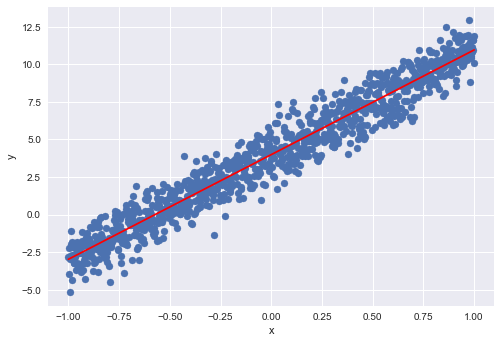

In [19]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

array([[1, 2],
       [3, 4]])

[1.000e+00 0.000e+00 9.000e+00 0.000e+00 2.500e+01 0.000e+00 4.900e+01
 0.000e+00 8.100e+01 0.000e+00 1.210e+02 0.000e+00 1.690e+02 0.000e+00
 2.250e+02 0.000e+00 2.890e+02 0.000e+00 3.610e+02 0.000e+00 4.410e+02
 0.000e+00 5.290e+02 0.000e+00 6.250e+02 0.000e+00 7.290e+02 0.000e+00
 8.410e+02 0.000e+00 9.610e+02 0.000e+00 1.089e+03 0.000e+00 1.225e+03
 0.000e+00 1.369e+03 0.000e+00 1.521e+03 0.000e+00 1.681e+03 0.000e+00
 1.849e+03 0.000e+00 2.025e+03 0.000e+00 2.209e+03 0.000e+00 2.401e+03
 0.000e+00 2.601e+03 0.000e+00 2.809e+03 0.000e+00 3.025e+03 0.000e+00
 3.249e+03 0.000e+00 3.481e+03 0.000e+00 3.721e+03 0.000e+00 3.969e+03
 0.000e+00 4.225e+03 0.000e+00 4.489e+03 0.000e+00 4.761e+03 0.000e+00
 5.041e+03 0.000e+00 5.329e+03 0.000e+00 5.625e+03 0.000e+00 5.929e+03
 0.000e+00 6.241e+03 0.000e+00 6.561e+03 0.000e+00 6.889e+03 0.000e+00
 7.225e+03 0.000e+00 7.569e+03 0.000e+00 7.921e+03 0.000e+00 8.281e+03
 0.000e+00 8.649e+03 0.000e+00 9.025e+03 0.000e+00 9.409e+03 0.000e+00
 9.801

6
